In [3]:
import numpy as np
from sklearn.datasets import *
from sklearn import neighbors

import matplotlib.pyplot as plt
%matplotlib inline

0.642857142857


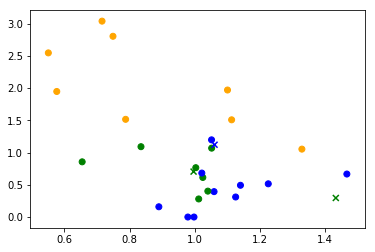

In [4]:
import _csv
with open("features.txt",'r') as f:
    features=list(_csv.reader(f, delimiter=" "))
with open("labels.txt",'r') as f:
    labels=list(_csv.reader(f, delimiter=" "))
del features[0]
del labels[0]
for i in range(len(features)):
    del features[i][0]
    
for i in range(len(features)):
    for j in range(len(features[i])):
        features[i][j]=float(features[i][j])
                
success=0            
for t in range(1,10):
    filename="experiments/fold"+str(t)+"_test.txt"
    with open(filename, 'r') as f:
        test_indices=list(_csv.reader(f, delimiter=","))
    test_indices=[x[0] for x in test_indices]
    test_indices=[int(x) for x in test_indices]
    
    #divide the time data into training and testing samples
    time_test=[]
    times=[features[x][0] for x in range(len(features))]
    a=sum(times)/len(times)#average of times
    for i in range(len(times)):
        times[i]/=a
    for i in range(len(times)):
        if i in test_indices:
            time_test.append(times[i])
            times[i]=-1       
    times=[x for x in times if x!=-1]
    time_Arr_test=np.array(time_test)
    time_Arr_train=np.array(times)

    #divide the movement data into training and testing samples
    movement_test=[]
    movements=[features[x][3] for x in range(len(features))]
    a=sum(movements)/len(movements)#average of movements
    for i in range(len(movements)):
        movements[i]/=a
    for i in range(len(movements)):
        if i in test_indices:
            movement_test.append(movements[i])
            movements[i]=-1
    movements=[x for x in movements if x!=-1]
    movement_Arr_train=np.array(movements)
    movement_Arr_test=np.array(movement_test)

    #divide the label data into training and testing samples
    level_test=[]
    levels=[labels[x][1] for x in range(len(labels))]
    for i in range(len(levels)):
        if i in test_indices:
            level_test.append(levels[i])
            levels[i]=-1
    levels=[x for x in levels if x!=-1]
    level_Arr_train=np.array(levels)
    level_Arr_test=np.array(level_test)
    
    #Print out a sample of the data, using the 9th test
    C=[]
    for i in range(len(level_Arr_train)):
        if level_Arr_train[i]=='N':
            C.append('b')
        elif level_Arr_train[i]=='I':
            C.append('orange')
        elif level_Arr_train[i]=='E':
            C.append('g')
    D=[]
    for i in range(len(level_Arr_test)):
        if level_Arr_test[i]=='N':
            D.append('b')
        elif level_Arr_test[i]=='I':
            D.append('orange')
        elif level_Arr_test[i]=='E':
            D.append('g')
    if t==9:    
        plt.scatter(time_Arr_train, movement_Arr_train, c=C)
        plt.scatter(time_Arr_test, movement_Arr_test, c=D, marker='x')
    
    #fit the model to the two parameters
    model = neighbors.KNeighborsClassifier(n_neighbors=len(level_Arr_train), weights='distance')
    X=np.vstack((time_Arr_train, movement_Arr_train)).T
    model.fit(X, level_Arr_train)
    
    #check for accuracy
    for i in range(len(level_Arr_test)):
        test_point=np.reshape([time_Arr_test[i], movement_Arr_test[i]], (1,2))
        if model.predict(test_point)[0]==level_Arr_test[i]:
            success+=1
print success/float(28)
            